# Use new comparison in features

Instead of comparing the transport layer number 2 or 3 to zero (in devices that have fewer transport layer), we compare to the layer before. Refer to image below. First image show how features were compared before and second image show the features for this model.

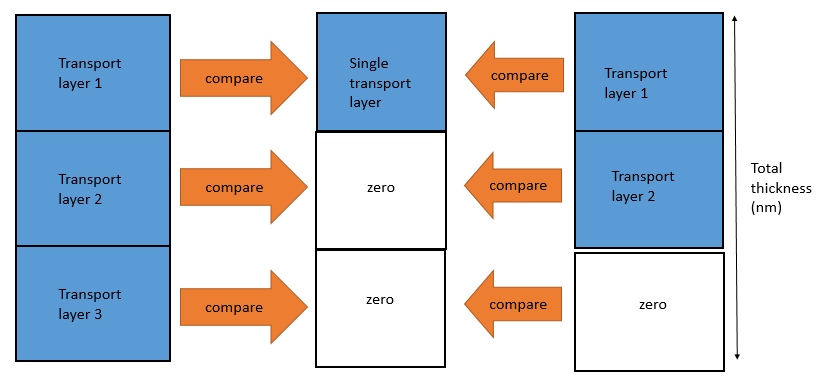

In [33]:
from IPython.display import Image
Image(filename="compare2.png", width=600, height=600)

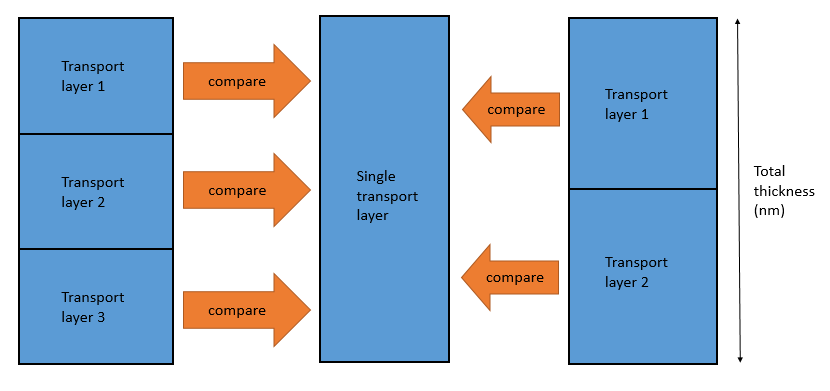

In [34]:
from IPython.display import Image
Image(filename="compare.png", width=600, height=600)

In [35]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
plt.style.use('ggplot')
%matplotlib inline

In [36]:
# change directory to excel file and read excel file
os.chdir('C:/Anaconda3/projects/oled')
df = pd.read_excel('oled.xlsx', sheetname='extend_side')
print(df.shape)
df.head()

(185, 21)


,no,homo1,homo2,homo3,homo4,thick_htl,triplet1,LUMO,HOMO,triplet2,...,lumo_d1,homo_d1,tripletdopant,triplet3,thick_etl,lumo5,lumo6,wf,cd/A,label
0,1,5.2,5.8,5.9,5.9,30,3.00,1.09,5.34,2.91,...,2.21,4.95,2.58,3.36,35,2.50,2.80,3.5,28.24,b
1,2,9.5,5.8,5.8,5.8,40,2.87,2.02,5.56,2.84,...,3.00,5.70,2.70,2.75,45,2.73,2.73,4.3,40.80,a
2,3,5.3,5.6,5.6,5.6,70,2.87,2.40,5.90,3.00,...,3.00,5.70,2.70,2.75,45,2.73,2.73,3.5,26.30,b
3,4,5.2,5.2,5.2,5.2,0,0.00,2.70,5.71,NaN,...,2.60,6.20,NaN,0.00,0,4.20,4.20,4.2,3.38,c
4,5,5.2,5.8,5.8,5.8,5,2.60,2.02,5.35,2.60,...,0.00,0.00,0.00,2.60,30,2.80,2.80,3.5,1.00,c


In [37]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)

tripletdopant    27
triplet2         18
triplet3          1
label             0
HOMO              0
homo1             0
homo2             0
homo3             0
homo4             0
thick_htl         0
triplet1          0
LUMO              0
thick             0
cd/A              0
lumo_d1           0
homo_d1           0
thick_etl         0
lumo5             0
lumo6             0
wf                0
no                0
dtype: int64

In [38]:
#fill the missing data
df.dropna(axis=0, inplace=True)
print(df.shape)

(143, 21)


In [39]:
df = df[list(df.columns)[1:]]
print(df.shape)
df.head()

(143, 20)


,homo1,homo2,homo3,homo4,thick_htl,triplet1,LUMO,HOMO,triplet2,thick,lumo_d1,homo_d1,tripletdopant,triplet3,thick_etl,lumo5,lumo6,wf,cd/A,label
0,5.2,5.8,5.9,5.9,30,3.00,1.09,5.34,2.91,25,2.21,4.95,2.58,3.36,35,2.50,2.80,3.5,28.24,b
1,9.5,5.8,5.8,5.8,40,2.87,2.02,5.56,2.84,20,3.00,5.70,2.70,2.75,45,2.73,2.73,4.3,40.80,a
2,5.3,5.6,5.6,5.6,70,2.87,2.40,5.90,3.00,20,3.00,5.70,2.70,2.75,45,2.73,2.73,3.5,26.30,b
4,5.2,5.8,5.8,5.8,5,2.60,2.02,5.35,2.60,30,0.00,0.00,0.00,2.60,30,2.80,2.80,3.5,1.00,c
9,9.5,5.5,5.5,5.5,45,2.87,2.55,5.90,2.80,20,2.20,4.80,2.59,2.75,45,2.73,2.73,4.3,60.30,a


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD4E58C630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CD4ED3F9B0>]], dtype=object)

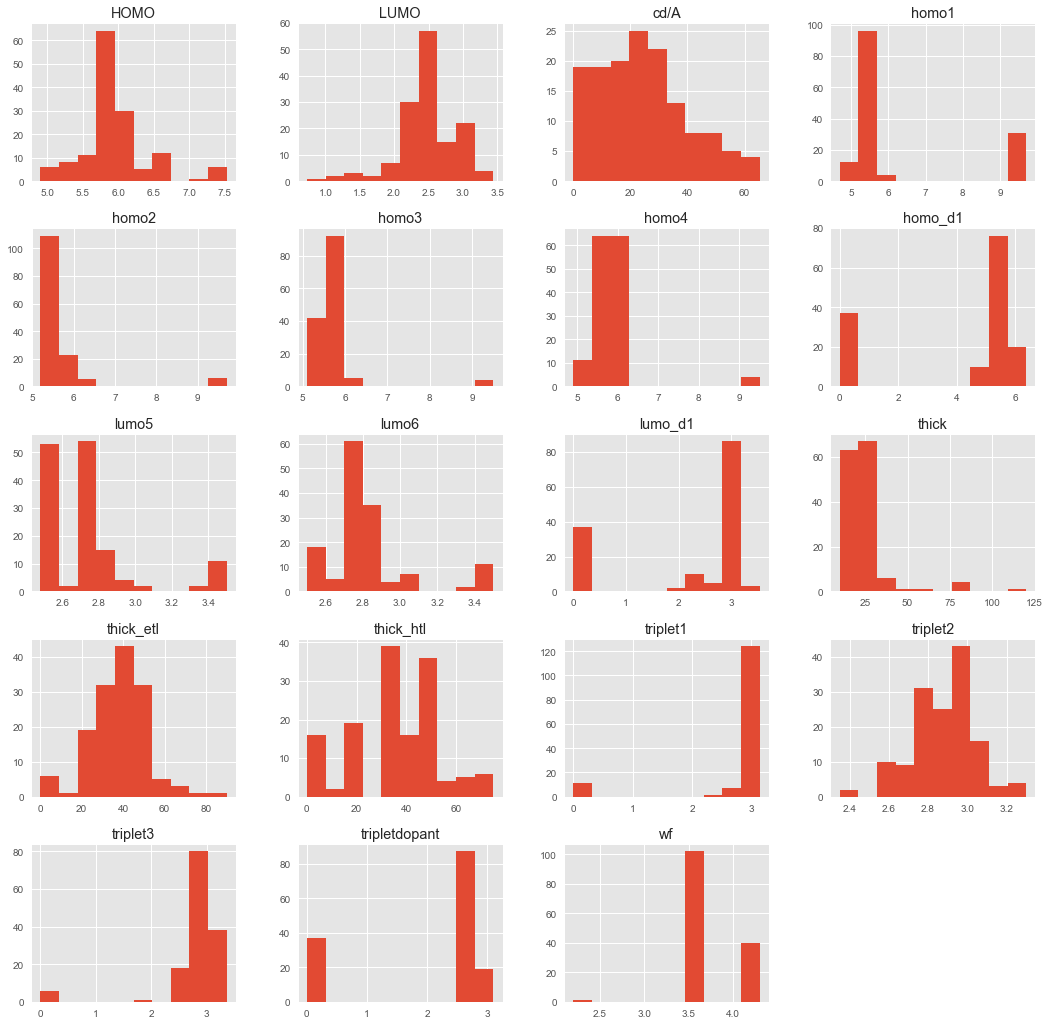

In [40]:
plt.rcParams['figure.figsize'] = (18.0, 18.0)
graph = df[list(df.columns)[:-1]]
graph.hist()

In [41]:
df.dtypes

homo1            float64
homo2            float64
homo3            float64
homo4            float64
thick_htl          int64
triplet1         float64
LUMO             float64
HOMO             float64
triplet2         float64
thick              int64
lumo_d1          float64
homo_d1          float64
tripletdopant    float64
triplet3         float64
thick_etl          int64
lumo5            float64
lumo6            float64
wf               float64
cd/A             float64
label             object
dtype: object

In [42]:
df.describe()

,homo1,homo2,homo3,homo4,thick_htl,triplet1,LUMO,HOMO,triplet2,thick,lumo_d1,homo_d1,tripletdopant,triplet3,thick_etl,lumo5,lumo6,wf,cd/A
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,6.137063,5.652727,5.811189,5.818531,34.160839,2.720280,2.463077,5.950420,2.883846,26.769231,2.155804,4.197203,2.012587,2.800839,38.041958,2.725594,2.797832,3.711189,24.663656
std,1.792263,0.858326,0.666513,0.669684,18.154133,0.793118,0.415233,0.491486,0.166649,14.052563,1.299661,2.498840,1.196252,0.656504,13.609687,0.266248,0.238895,0.376736,15.437201
min,4.700000,5.200000,5.100000,4.900000,0.000000,0.000000,0.730000,4.900000,2.350000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.480000,2.500000,2.200000,0.000000
25%,5.200000,5.200000,5.500000,5.500000,20.000000,2.870000,2.300000,5.700000,2.785000,20.000000,0.000000,0.000000,0.000000,2.750000,32.500000,2.500000,2.730000,3.500000,12.000000
50%,5.300000,5.500000,5.700000,5.800000,30.000000,2.980000,2.400000,5.900000,2.900000,25.000000,3.000000,5.700000,2.700000,2.750000,40.000000,2.730000,2.730000,3.500000,22.500000
75%,5.400000,5.600000,5.900000,5.900000,45.000000,3.000000,2.700000,6.100000,3.000000,30.000000,3.000000,5.700000,2.700000,3.245000,45.000000,2.730000,2.800000,4.240000,33.200000
max,9.700000,9.700000,9.500000,9.500000,75.000000,3.140000,3.440000,7.530000,3.300000,120.000000,3.540000,6.380000,3.100000,3.360000,90.000000,3.500000,3.500000,4.300000,65.307692


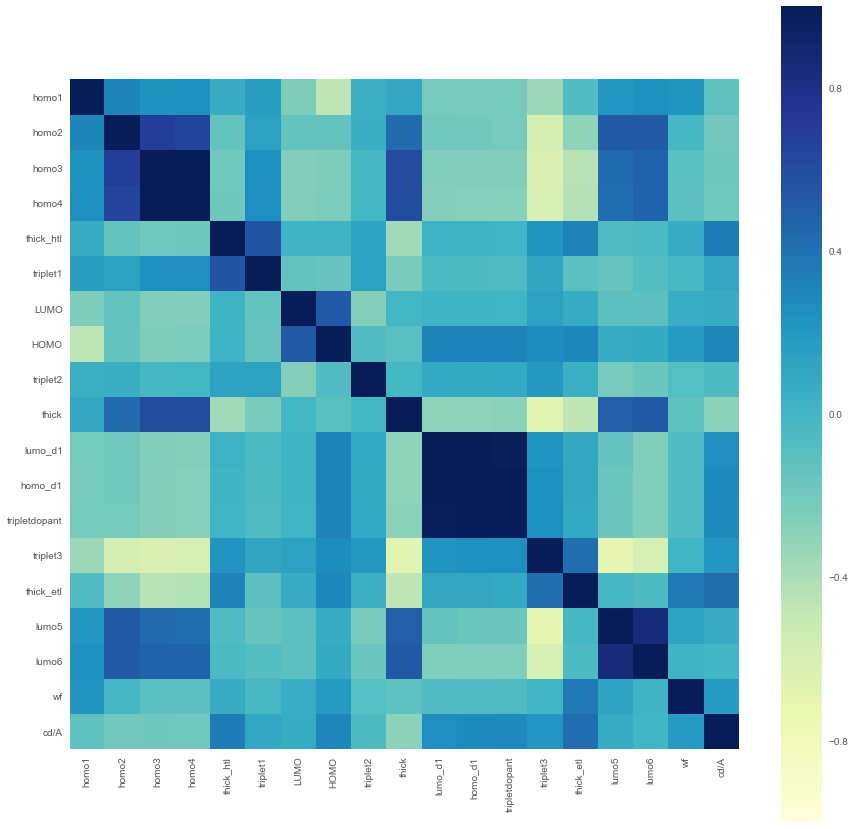

List the features in descending order of their correlation with cd/A:

thick_etl:   0.42916422450997804
thick_htl:   0.35848229004752324
HOMO:   0.29888023867170654
thick:   -0.29653912713772224
tripletdopant:   0.28572053749306003
homo_d1:   0.27680597128624346
lumo_d1:   0.26309075008092886
triplet3:   0.20800823865172507
homo2:   -0.19836363625678663
homo4:   -0.18977893435713913
wf:   0.18742628168707037
homo3:   -0.18209197934200028
homo1:   -0.12054922192064421
triplet1:   0.10598588701673271
lumo5:   0.07774539128649743
LUMO:   0.06693713825879542
triplet2:   -0.049945247837649406
lumo6:   -0.0026420883589290804


In [43]:
X = df[list(df.columns)[:-1]]
corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', annot=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

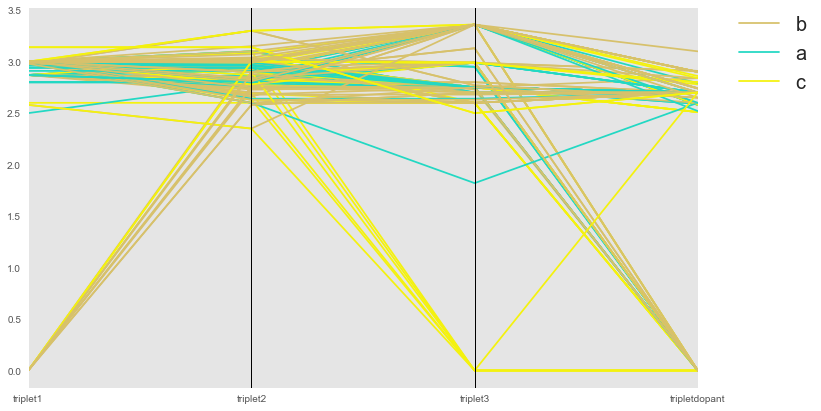

In [44]:
# parallel coordinate
X = df[ ['triplet1']+ ['triplet2']+ ['triplet3'] + ['tripletdopant'] + ['label']]

plt.rcParams['figure.figsize'] = (12,7) 
params = {'legend.fontsize': 20, 'legend.loc':'best'}
plt.rcParams.update(params)
parallel_coordinates(X, 'label')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

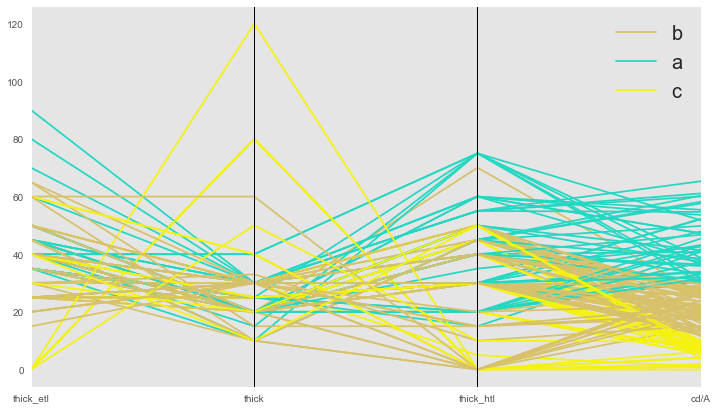

In [45]:
# parallel coordinate
X = df[['thick_etl'] + ['thick']+ ['thick_htl'] + ['cd/A'] +['label']]

plt.rcParams['figure.figsize'] = (12,7) 
params = {'legend.fontsize': 20}
plt.rcParams.update(params)
parallel_coordinates(X, 'label')
plt.show()

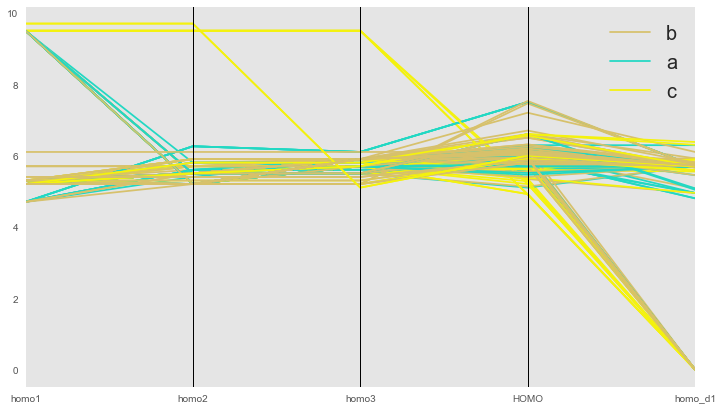

In [46]:
# parallel coordinate
X = df[ ['homo1']+ ['homo2']+ ['homo3'] + ['HOMO'] + ['homo_d1'] + ['label']]

plt.rcParams['figure.figsize'] = (12,7) 
params = {'legend.fontsize': 20, 'legend.loc':'best'}
plt.rcParams.update(params)
parallel_coordinates(X, 'label')
plt.show()

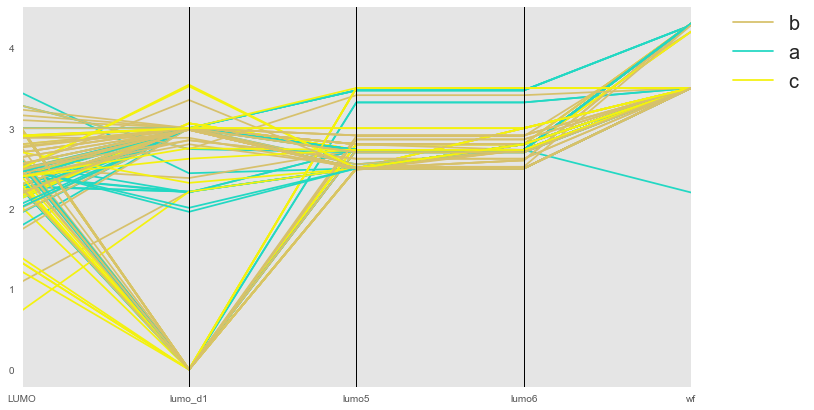

In [47]:
# parallel coordinate
X = df[ ['LUMO'] + ['lumo_d1'] + ['lumo5']+ ['lumo6'] + ['label'] + ['wf']]

plt.rcParams['figure.figsize'] = (12,7) 
params = {'legend.fontsize': 20, 'legend.loc':'best'}
plt.rcParams.update(params)
parallel_coordinates(X, 'label')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [48]:
X = df[list(df.columns)[:-2]]
y = df[['cd/A']]
print(X.shape)
X.head()

(143, 18)


,homo1,homo2,homo3,homo4,thick_htl,triplet1,LUMO,HOMO,triplet2,thick,lumo_d1,homo_d1,tripletdopant,triplet3,thick_etl,lumo5,lumo6,wf
0,5.2,5.8,5.9,5.9,30,3.00,1.09,5.34,2.91,25,2.21,4.95,2.58,3.36,35,2.50,2.80,3.5
1,9.5,5.8,5.8,5.8,40,2.87,2.02,5.56,2.84,20,3.00,5.70,2.70,2.75,45,2.73,2.73,4.3
2,5.3,5.6,5.6,5.6,70,2.87,2.40,5.90,3.00,20,3.00,5.70,2.70,2.75,45,2.73,2.73,3.5
4,5.2,5.8,5.8,5.8,5,2.60,2.02,5.35,2.60,30,0.00,0.00,0.00,2.60,30,2.80,2.80,3.5
9,9.5,5.5,5.5,5.5,45,2.87,2.55,5.90,2.80,20,2.20,4.80,2.59,2.75,45,2.73,2.73,4.3


In [49]:
y.head()

,cd/A
0,28.24
1,40.80
2,26.30
4,1.00
9,60.30


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

scaler = Normalizer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Choose linear regression as our regressor from scikit-learn
regressor = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)

regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

R-squared:  0.388131032425
MS Error:  135.690647971


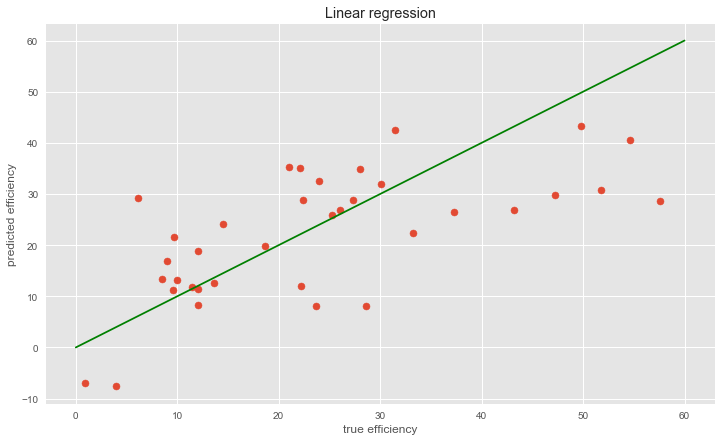

In [51]:
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' Linear regression ')
plt.show()

In [52]:
# print predicted value and actual value to see how far off the prediction
y_test = y_test.values.tolist()
for i, prediction in enumerate(y_predictions):
    print('Predicted: %.2f,  Actual: %s' % (prediction, y_test[i]))

Predicted: 29.77,  Actual: [47.2]
Predicted: 29.18,  Actual: [6.1]
Predicted: -6.94,  Actual: [0.9]
Predicted: 30.73,  Actual: [51.8]
Predicted: 35.37,  Actual: [21.0]
Predicted: 35.15,  Actual: [22.1]
Predicted: 19.92,  Actual: [18.6]
Predicted: 42.53,  Actual: [31.5]
Predicted: 21.60,  Actual: [9.7]
Predicted: 13.31,  Actual: [8.5]
Predicted: 24.10,  Actual: [14.538461538461538]
Predicted: 18.80,  Actual: [12.0]
Predicted: 8.19,  Actual: [23.7]
Predicted: 13.09,  Actual: [10.0]
Predicted: 34.86,  Actual: [28.0]
Predicted: 25.89,  Actual: [25.3]
Predicted: 28.86,  Actual: [27.3]
Predicted: 26.86,  Actual: [26.0]
Predicted: 26.86,  Actual: [43.2]
Predicted: 11.76,  Actual: [11.5]
Predicted: -7.62,  Actual: [4.0]
Predicted: 8.30,  Actual: [12.0]
Predicted: 16.85,  Actual: [9.0]
Predicted: 26.49,  Actual: [37.3]
Predicted: 12.62,  Actual: [13.6]
Predicted: 32.54,  Actual: [24.0]
Predicted: 8.19,  Actual: [28.6]
Predicted: 31.94,  Actual: [30.1]
Predicted: 28.89,  Actual: [22.4]
Predicted

In [53]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=4, shuffle=True, random_state=2)
scores = cross_val_score(regressor, X, y, cv=cv)
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [ 0.05255089  0.51370204 -0.07098846 -0.01806489]
mean score:  0.119299893559


In [54]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=2)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

R-squared:  0.696328338358
MS Error:  67.3435109839


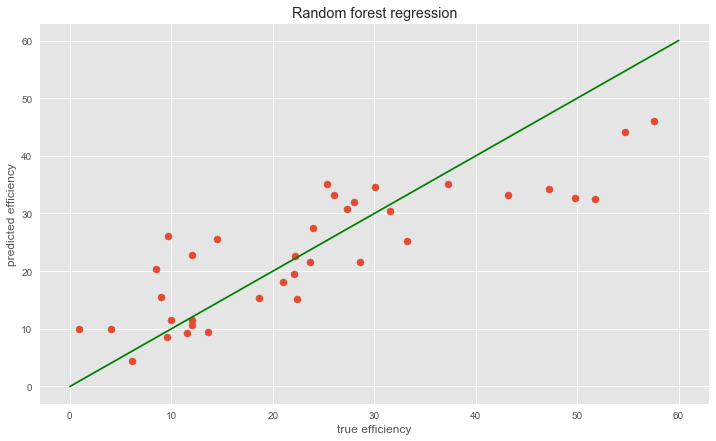

In [55]:
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' Random forest regression ')
plt.show()

In [56]:
kfold = KFold(n_splits=4, shuffle=True, random_state=2)
scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [ 0.45753258  0.71528987  0.56317372  0.6495792 ]
mean score:  0.596393842298


In [57]:
importance = regressor.feature_importances_.tolist()
names = list(X)

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

        column              importance
0       homo1               0.04707458600826262
1       homo2               0.05926285516971157
2       homo3               0.018814731531496737
3       homo4               0.08176196269608002
4       thick_htl           0.06915788785122647
5       triplet1            0.009059220237139058
6       LUMO                0.050190256779877415
7       HOMO                0.03674159688539206
8       triplet2            0.0769447875216677
9       thick               0.06775448443920011
10      lumo_d1             0.03160211737025475
11      homo_d1             0.053428778357923756
12      tripletdopant       0.08720958793394293
13      triplet3            0.11421145099505776
14      thick_etl           0.09279294398898567
15      lumo5               0.08275831784096312
16      lumo6               0.004875986077309674
17      wf                  0.016358448315508596


([<matplotlib.axis.XTick at 0x1cd515a36d8>,
 <a list of 18 Text xticklabel objects>)

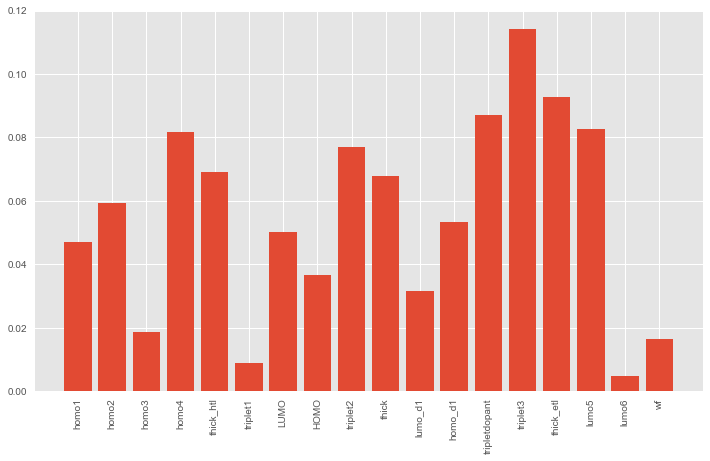

In [58]:
x = np.arange(18)
plt.bar(x, importance)
plt.xticks(x, names, rotation=90)

In [59]:
from sklearn.neural_network import MLPRegressor
# choose regression algorithms
regressor = MLPRegressor(random_state=12, hidden_layer_sizes=18, activation='relu', solver='adam', max_iter=100000)
regressor.fit(X_train, y_train.values.ravel())

# print r squared, scores and coefficient
y_predictions = regressor.predict(X_test)
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

R-squared:  0.356574653787
MS Error:  142.688723853


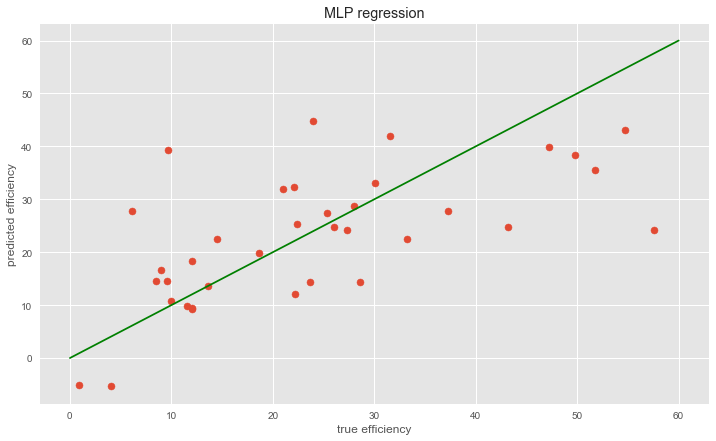

In [60]:
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' MLP regression ')
plt.show()

In [61]:
kfold = KFold(n_splits=4, shuffle=True, random_state=2)
scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [-0.03958841  0.62226295 -0.08070351  0.24878982]
mean score:  0.187690211814


In [62]:
from sklearn.svm import SVR

regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

R-squared:  0.11632450949
MS Error:  195.967611135


In [63]:
kfold = KFold(n_splits=4, shuffle=True, random_state=2)
scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [  8.58369414e-02   3.78155888e-01   1.04881967e-01   2.56037385e-04]
mean score:  0.142282708286


# Parameter tuning for random forest

Since random forest predict the efficiency the best and has the best r2 score, we tune the hyperparameter to get the best result. The average r2 score is ~0.6 for the entire dataset.

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

estimator = list(np.arange(5, 50, 5))
parameters = {
                'n_estimators': estimator,
                'min_samples_leaf': (1, 2, 3, 4, 5),
                'min_samples_split': (2, 3, 4, 5)
             }
regressor = RandomForestRegressor(random_state=2)
reg = GridSearchCV(regressor, parameters, verbose=1, scoring='r2', cv=kfold)

reg.fit(X_train, y_train.values.ravel())
print('Best score: %0.3f' % reg.best_score_)
print('Best parameters set:')
best_parameters = reg.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
y_predictions = reg.predict(X_test)
print('r2 on test set:', r2_score(y_test, y_predictions))

scores = cross_val_score(reg, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   37.4s finished


Best score: 0.186
Best parameters set:
	min_samples_leaf: 3
	min_samples_split: 2
	n_estimators: 5
r2 on test set: 0.661521639851
Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   36.0s finished


Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   38.1s finished


Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   38.1s finished


Fitting 4 folds for each of 180 candidates, totalling 720 fits
scores:  [ 0.45802571  0.72584832  0.5545522   0.56486664]
mean score:  0.575823220373


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   36.6s finished


In [78]:
regressor = RandomForestRegressor(random_state=2)
regressor.fit(X_train, y_train.values.ravel())

# # Save Model Using Pickle
# import pickle

# # save the model to disk
# filename = 'rforest_model.sav'
# pickle.dump(regressor, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.696328338358


# Tuning using TPOT

In [12]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2)
tpot.fit(X_train, y_train.values.ravel())
print(tpot.score(X_test, y_test))
tpot.export('tpot_oled_pipeline.py')

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generation 1 - Current best internal CV score: 175.41176199275952


Generation 2 - Current best internal CV score: 171.4639046730776


Generation 3 - Current best internal CV score: 166.2303886754085


Generation 4 - Current best internal CV score: 166.2303886754085


Generation 5 - Current best internal CV score: 166.2303886754085


Generation 6 - Current best internal CV score: 163.09089412826387


Generation 7 - Current best internal CV score: 160.79380643853895


Generation 8 - Current best internal CV score: 160.79380643853895


Generation 9 - Current best internal CV score: 160.72609345345063


Generation 10 - Current best internal CV score: 160.72609345345063



Best pipeline: KNeighborsRegressor(FeatureAgglomeration(input_matrix, affinity=manhattan, linkage=average), n_neighbors=8, p=2, weights=distance)
45.9894721113


True

model: KNR regression
R-squared:  0.790655187874
MS Error:  46.4251902155
cv scores:  [ 0.20884544  0.65047626  0.49596281  0.27490271]
mean score:  0.407546804956


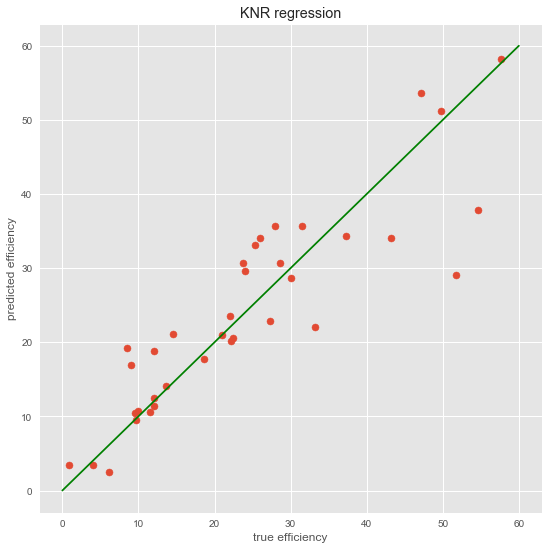

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import FeatureAgglomeration
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

# # Score on the training set was:-160.72609345345063
# exported_pipeline = make_pipeline(
#     FeatureAgglomeration(affinity="manhattan", linkage="average"),
#     KNeighborsRegressor(n_neighbors=8, p=2, weights="distance")
# )

# exported_pipeline.fit(training_features, training_target)
# results = exported_pipeline.predict(testing_features)


regressor = KNeighborsRegressor(n_neighbors=8, p=2, weights="distance")

regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('model: KNR regression')
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

scores = cross_val_score(regressor, X, y.values.ravel(), cv=cv)
print('cv scores: ', scores)
print('mean score: ', scores.mean())

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' KNR regression ')
plt.show()

# Conclusion for this model

#### Using random forest algorithm, our model managed to predict the efficiency of blue OLED device with R2 score of ~0.6. This score can be improved by adding more data, especially devices with higher efficiency. Plus, we can also select features and compare them in a new way other than the one used in this model